In [1]:
# Analyze microplate reading from a 96 well plate

In [2]:
import csv;
import matplotlib.pyplot as plt; 
import os; 
import seaborn as sns; # Import Seaborn
import pandas as pd; # Import Pandas
import statistics


In [3]:
filename = "original"; 
file_list = ["Temperature", "Membrane", "PDMS"];
variable_type = ["Cell", "Water", "Air"];
data_files = ["Membrane_Cell", "PDMS_Cell", "Membrane_Water", "PDMS_Water", "Membrane_Air", "PDMS_Air"]; 


In [4]:
# Read data from a csv
def read_file(filename):
    filepath = os.path.join("Data", "Formatted", filename + ".csv")
    
    data_read = [];
    read_file=open(filepath, "r"); 
    reader = csv.reader(read_file);
    
    for line in reader: 
        data_read.append(line);
    read_file.close()
      
    return(data_read)


In [5]:
# Save temperature, membrane, and pdms data as separate csv file 
def parse_original(filename, data_list):
    filename = os.path.join("Data" , "Formatted", filename + '.csv') 
    text_file = open(filename, "a+");text_file = open(filename, "r+");
    
    for line in data_list:
        if len(line)>1:
            for i in range(len(line)):
                if i == 0: text_file.write("\n" + line[i])
                else: text_file.write(", " + line[i] ) 
    text_file.close()   
    

In [6]:
# Parse the cell, water, and air in each of the Membrane and PDMS coverings 
def parse_variable(filename, variable_type, interval_start, interval_stop):
    file_source = os.path.join("Data" , "Formatted", filename + '.csv');
    file_destination = os.path.join("Data" , "Formatted", filename + "_" + variable_type + '.csv');
    
    data_read = [];
    read_file=open( file_source, "r"); reader = csv.reader(read_file);
    for line in reader: 
        data_read.append(line);
    read_file.close()
    
    line_count = 0; interval_count = 0; 
    write_file = open(file_destination, "a+"); 
    write_file = open(file_destination, "r+");
    
    for line in data_read:
        
        if line_count%9 == 0 and line_count > 0: 
            interval_count = 0; 
            write_file.write("\n")
            
        if interval_count > interval_start and interval_count < interval_stop: 
            for i in range(len(line)):
                write_file.write(line[i] + ", ")
                
        interval_count  = interval_count  + 1; 
        line_count = line_count + 1; 
                    
    write_file.close()       
    

In [7]:
# Parse the instrument measurements by membrane 
def parse_instrument_measurements(filename, file_list, variable_type):
    filepath = os.path.join("Data", filename + ".csv")
    time = []; temperature = []; data_membrane = []; data_pdms = []; 
    
    file=open( filepath, "r"); reader = csv.reader(file);
        
    for line in reader: 
        temperature.append(line[1]); 
        data_membrane.append(line[2:8]); 
        data_pdms.append(line[8:14]);
    
    parse_original(file_list[0], temperature);
    parse_original(file_list[1], data_membrane);
    parse_original(file_list[2], data_pdms);

# Parse instrument measurements into temperature and membrane types 
parse_instrument_measurements(filename, file_list, variable_type)

# Parse the .csv to the variable types - cell, water, and air
for i in range(len(file_list)):
    parse_variable(file_list[i], variable_type[0], 0, 7)
    parse_variable(file_list[i], variable_type[1], 6, 8)
    parse_variable(file_list[i], variable_type[2], 7, 9)  
    

In [8]:
# Build the time list 
def time_list(data):
    length = len(data);
    time = []; i = 0; 
    while i < length: time.append(i*15/60); i = i+1; 
    return(time)

# Convert the data to a float 
def convert_to_float(data): 
    data_list_of_list = []; 
    
    for line in data: 
        data_list = [];
        
        for measurement in line:  
            if (len(measurement)) > 2:
                measurement_float = float(measurement)
                data_list.append(measurement_float);  
                
        data_list_of_list.append(data_list)
        
    return(data_list_of_list)


In [9]:
# Box plots
def box_plot_of_data(file): 
    
    data = read_file(file); 
    data_float = convert_to_float(data); 
    plt.boxplot(data_float, showfliers=False);
     
    plt.title(file)
    plt.xlabel("Time (hours)"); plt.xlim([0,100])
    plt.ylabel("Absorbance ?650nm (RFU)"); plt.ylim([0,1.4])
    

#plt.figure(figsize=(30,10))

#box_plot_of_data("Membrane_Cell")
#box_plot_of_data("PDMS_Cell")
#box_plot_of_data("Membrane_Water")
#box_plot_of_data("PDMS_Water")
#box_plot_of_data("Membrane_Air")
#box_plot_of_data("PDMS_Air")

#plt.show()

#file_save = os.path.join("Figures", "BoxPlot_" + ".png")
#plt.savefig(file_save)



In [10]:
# Find the average and stdev 
def scatter_average(file):
    data = read_file(file); 
    float_data = convert_to_float(data);
    
    average_list = []; stdev_list = []; 
    for line in float_data:
        if len(line) > 0:
            average = sum(line)/len(line); average_list.append(average); 
            stdev = statistics.stdev(line); stdev_list.append(stdev);
    
    return(average_list, stdev_list)


In [11]:
# Scatter plot of the averages and error
def scatter_average_with_error(data_file, max_time):
    average, stdev = scatter_average(data_file); 
    time = time_list(average); 
    plt.errorbar(time, average, yerr=stdev, label = data_file)
    plt.xlabel("Time (hours)"); plt.xlim([0,max_time])
    plt.ylabel("Absorbance ?650nm (RFU)"); plt.ylim([0,1.6])
    plt.title("Measurement Average with Error Bars")
    #plt.legend(bbox_to_anchor=(1, 1));
    plt.legend()
    

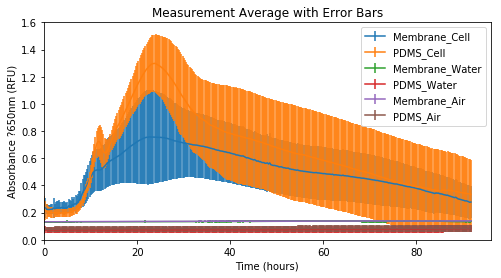

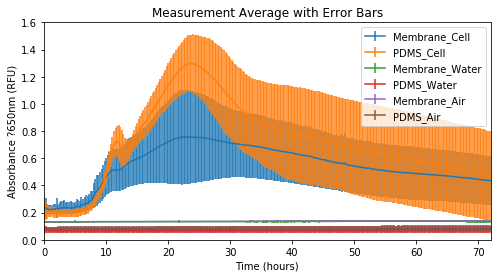

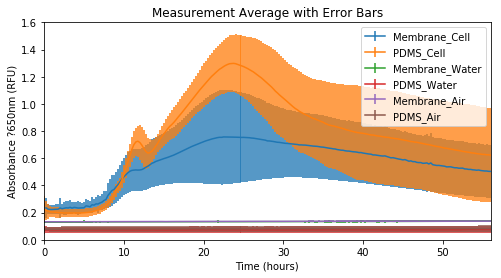

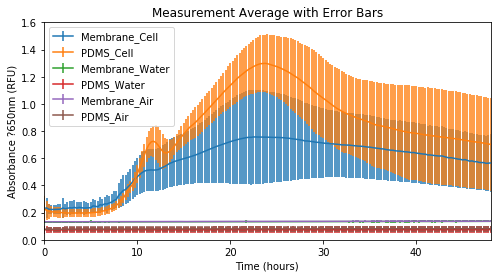

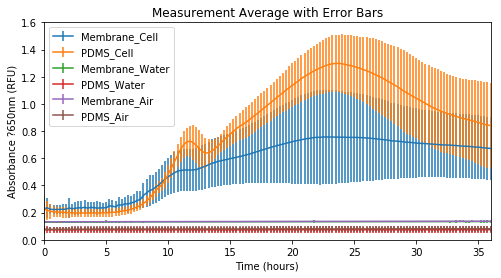

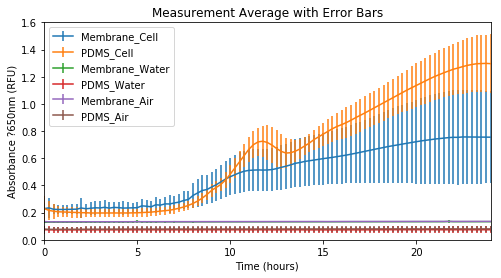

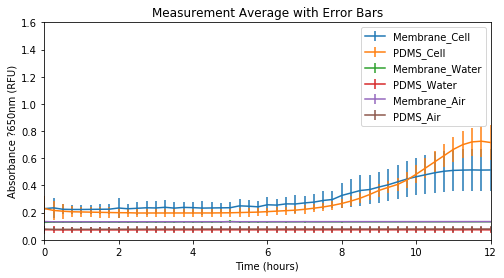

In [12]:
# Build the scatter plots with the error 
max_time_interval = [96, 72, 56, 48, 36, 24, 12]; 
for j in range(len(max_time_interval)):
    plt.figure(figsize=(8,4));
    
    for i in range(len(data_files)):
        scatter_average_with_error(data_files[i], max_time_interval[j])
    
    files_save = os.path.join("Figures", "Measurement Average with Error Bars for " + str(max_time_interval[j]) + " hours.png");
    plt.savefig(files_save, dpi=600)
    plt.show()
